<a href="https://colab.research.google.com/github/payallgupta/CODSOFT/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully loaded the dataset.

--- Step 2: Explore and Clean the Data ---
First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

    

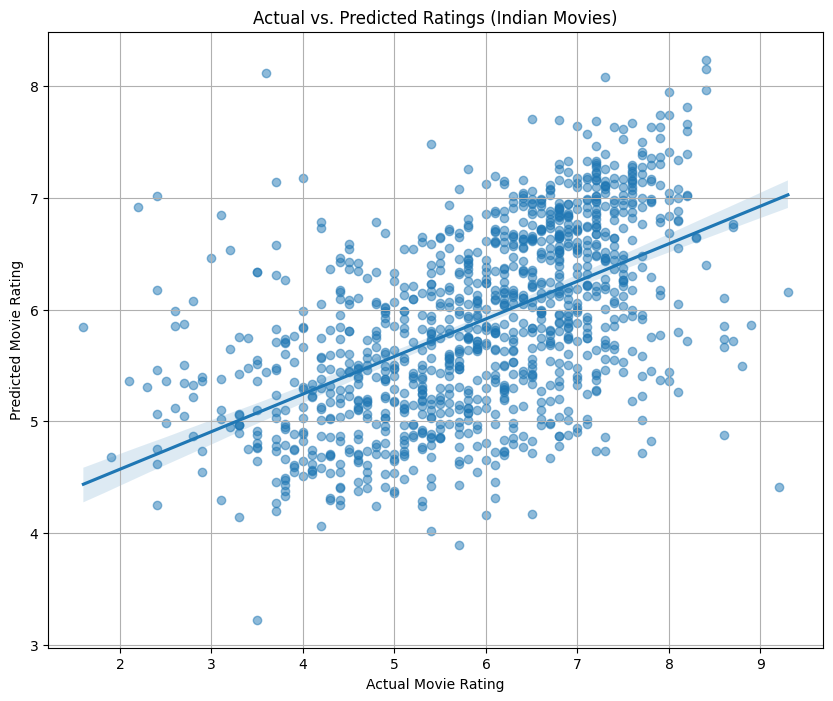

In [1]:
# =======================================================
# TASK 2: INDIAN MOVIE RATING PREDICTION (for Google Colab - CORRECTED)
# =======================================================

# --- Step 0: Import necessary libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Step 1: Load the Data from Google Colab ---
csv_path = '/content/IMDb Movies India.csv'
try:
    df = pd.read_csv(csv_path, encoding='latin-1')
    print("Successfully loaded the dataset.")
except FileNotFoundError:
    print(f"Error: Make sure the file '{csv_path}' is uploaded to your Colab session.")
    exit()

print("\n--- Step 2: Explore and Clean the Data ---")

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# -- Data Cleaning Decisions --

# 1. Drop rows where the target ('Rating') is missing.
df.dropna(subset=['Rating'], inplace=True)
print(f"\nDropped rows with missing 'Rating'. Shape is now: {df.shape}")

# 2. Drop rows where any of our key features are missing.
#    *** THIS IS THE CORRECTED LINE ***
#    I've added 'Year' and 'Duration' here to ensure they have no missing values
#    before I try to convert them to numbers in the next step.
df.dropna(subset=['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)
print(f"Dropped rows with other missing key features. Shape is now: {df.shape}")


# 3. Now, I can safely convert the text columns to numbers.
#    'Year' is like '(2019)'. I need to remove the parentheses.
df['Year'] = df['Year'].str.strip('()').astype(int)

#    'Duration' is like '135 min'. I need to remove ' min' and convert to an integer.
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

#    'Votes' is a string with commas, like '5,811'. I'll remove the commas and convert to an integer.
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

# 4. Drop the 'Name' column as it's not a useful feature for generalization.
df.drop('Name', axis=1, inplace=True)
print("\nCleaned up Year, Duration, and Votes columns and dropped the 'Name' column.")

print("\nDataset info after cleaning:")
df.info()
# Now it should be perfectly clean with no missing values.


print("\n--- Step 3: Feature Engineering ---")
# Convert categorical text columns to numbers using frequency encoding.
features_to_encode = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in features_to_encode:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)

print("\nConverted categorical columns to numbers using frequency encoding.")
print("First 5 rows of the processed data:")
print(df.head())


print("\n--- Step 4: Building and Training the Regression Model ---")

# Define features (X) and target (y)
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Use a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nModel training is complete!")


print("\n--- Step 5: Evaluating the Model ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize the results with a regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Movie Rating')
plt.ylabel('Predicted Movie Rating')
plt.title('Actual vs. Predicted Ratings (Indian Movies)')
plt.grid(True)
plt.show()